In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

In [4]:
# Load JSON from a file
with open("/home/jakob/software/doumeki/bulkice_doumeki/data/Materials/IceCubeICE.dat", "r") as f:
    data = json.load(f)

In [8]:
depth = np.array(data["jDepth_spice"])
abs_length = np.array(data["ja400inv_spice"])
sca_length = np.array(data["jbe400inv_spice"])

abs_coeff = 1/abs_length
sca_coeff = 1/sca_length

idx = 88

d, a, s = depth[idx], abs_length[idx], sca_length[idx]


# min/max absorption length

idx_min_abs = np.argmin(abs_length)
idx_max_abs = np.argmax(abs_length)
idx_avg_abs = np.argmin(np.abs(abs_length-abs_length.mean()))

d_min_abs = depth[idx_min_abs]
d_max_abs = depth[idx_max_abs]
d_avg_abs = depth[idx_avg_abs]

# min/max scattering length

idx_min_sca = np.argmin(sca_length)
idx_max_sca = np.argmax(sca_length)
idx_avg_sca = np.argmin(np.abs(sca_length-sca_length.mean()))

d_min_sca = depth[idx_min_sca]
d_max_sca = depth[idx_max_sca]
d_avg_sca = depth[idx_avg_sca]

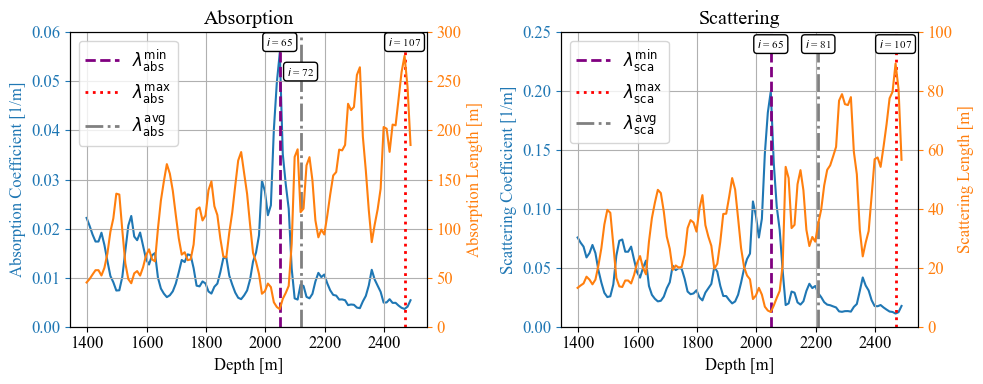

In [119]:
box_props = dict(boxstyle='round', facecolor='white')
txt_props = dict(fontsize=8, va="center", ha="center", zorder=20)

fig, ax = plt.subplots(1,2, figsize = (10,4))

ax[0].plot(depth, abs_coeff, color = "C0", zorder = 1)
ax[0].axvline(d_min_abs, color = "purple", ls = "--", lw = 2, label = r"$\lambda_{\text{abs}}^{\text{min}}$")
ax[0].axvline(d_max_abs, color = "red", ls = ":", lw = 2, label = r"$\lambda_{\text{abs}}^{\text{max}}$")
ax[0].axvline(d_avg_abs, color = "grey", ls = "-.", lw = 2, label = r"$\lambda_{\text{abs}}^{\text{avg}}$")

ax0 = ax[0].twinx()
ax0.plot(depth, abs_length, color = "C1", zorder = ax[0].get_zorder()+1)
ax0.set_ylabel("Absorption Length [m]", color = "C1")
ax0.tick_params(axis = "y", colors = "C1")
ax0.set_ylim(0,300)

ax[0].text(x = d_min_abs, y = 0.058, s = r"$i$ = {:.0f}".format(idx_min_abs), bbox = box_props, **txt_props) 
ax[0].text(x = d_max_abs, y = 0.058, s = r"$i$ = {:.0f}".format(idx_max_abs), bbox = box_props, **txt_props) 
ax[0].text(x = d_avg_abs, y = 0.052, s = r"$i$ = {:.0f}".format(idx_avg_abs), bbox = box_props, **txt_props) 

ax[0].set_xlabel("Depth [m]")
ax[0].set_ylabel("Absorption Coefficient [1/m]", color = "C0")
ax[0].set_title("Absorption")
ax[0].tick_params(axis = "y", colors = "C0")
ax[0].set_ylim(0,0.06)
ax[0].legend()
ax[0].grid()


ax[1].plot(depth, sca_coeff, color = "C0", zorder = 0)
ax[1].axvline(d_min_sca, color = "purple", ls = "--", lw = 2, label = r"$\lambda_{\text{sca}}^{\text{min}}$")
ax[1].axvline(d_max_sca, color = "red", ls = ":", lw = 2, label = r"$\lambda_{\text{sca}}^{\text{max}}$")
ax[1].axvline(d_avg_sca, color = "grey", ls = "-.", lw = 2, label = r"$\lambda_{\text{sca}}^{\text{avg}}$")

ax1 = ax[1].twinx()
ax1.plot(depth, sca_length, color = "C1", zorder = ax[1].get_zorder()+1)
ax1.set_ylabel("Scattering Length [m]", color = "C1")
ax1.tick_params(axis = "y", colors = "C1")
ax1.set_ylim(0,100)

ax[1].text(x = d_min_sca, y = 0.24, s = r"$i$ = {:.0f}".format(idx_min_sca), bbox = box_props, **txt_props) 
ax[1].text(x = d_max_sca, y = 0.24, s = r"$i$ = {:.0f}".format(idx_max_sca), bbox = box_props, **txt_props) 
ax[1].text(x = d_avg_sca, y = 0.24, s = r"$i$ = {:.0f}".format(idx_avg_sca), bbox = box_props, **txt_props) 

ax[1].set_xlabel("Depth [m]")
ax[1].set_ylabel("Scattering Coefficient [1/m]", color = "C0")
ax[1].set_title("Scattering")
ax[1].tick_params(axis = "y", colors = "C0")
ax[1].set_ylim(0,0.25)
ax[1].legend()
ax[1].grid()

plt.tight_layout()

In [141]:
#print values

print(f"-----------------\nAverage Absorption Length\n-----------------\nIndex: {idx_avg_abs}\nDepth: {d_avg_abs} m \nAbsorption Length: {abs_length[idx_avg_abs]} m\nCube Length: [{-abs_length[idx_avg_abs]*2}, {abs_length[idx_avg_abs]*2}] m\n")

print(f"-----------------\nMinimum Absorption Length\n-----------------\nIndex: {idx_min_abs}\nDepth: {d_min_abs} m \nAbsorption Length: {abs_length[idx_min_abs]} m\nCube Length: [{-abs_length[idx_min_abs]*2}, {abs_length[idx_min_abs]*2}] m\n")

print(f"-----------------\nMaximum Absorption Length\n-----------------\nIndex: {idx_max_abs}\nDepth: {d_max_abs} m \nAbsorption Length: {abs_length[idx_max_abs]} m\nCube Length: [{-abs_length[idx_max_abs]*2}, {abs_length[idx_max_abs]*2}] m\n")

-----------------
Average Absorption Length
-----------------
Index: 72
Depth: 2118.4 m 
Absorption Length: 116.7 m
Cube Length: [-233.4, 233.4] m

-----------------
Minimum Absorption Length
-----------------
Index: 65
Depth: 2048.5 m 
Absorption Length: 17.9 m
Cube Length: [-35.8, 35.8] m

-----------------
Maximum Absorption Length
-----------------
Index: 107
Depth: 2468.3 m 
Absorption Length: 276.1 m
Cube Length: [-552.2, 552.2] m



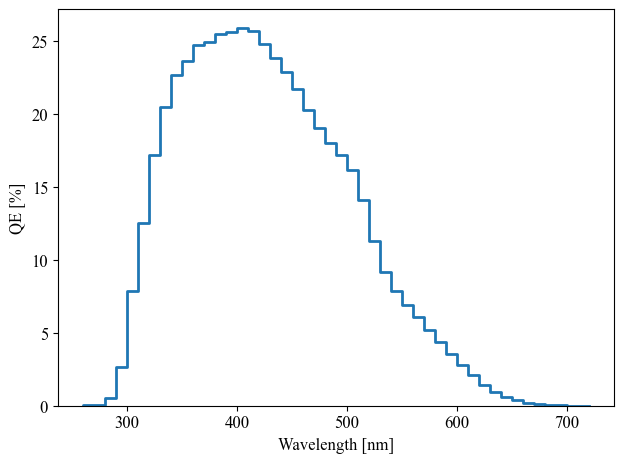

In [9]:
qe_path = "./../../mdom/InputFile/TA0001_HamamatsuQE.data"

qe = pd.read_csv(qe_path, sep=" ", header = None)
qe.columns = ["wvl", "pdf"]


fig, ax = plt.subplots(1,1)
ax.step(qe.wvl, qe.pdf, lw = 2)
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("QE [%]")
ax.set_ylim(0,)
plt.tight_layout()